<a href="https://colab.research.google.com/github/Yogs005/NYC_Taxi_Trip_Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import geopy.distance
from math import radians,cos,sin,asin,sqrt,atan2
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import datetime as dt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/Python Data/Copy of NYC Taxi Data.csv'
df=pd.read_csv(filename)

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 8.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 
     |████████████████████████████████| 16.7 MB 47.4 MB/s 


In [ ]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


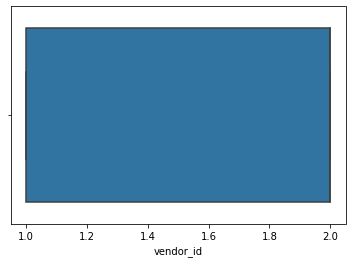

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.vendor_id)

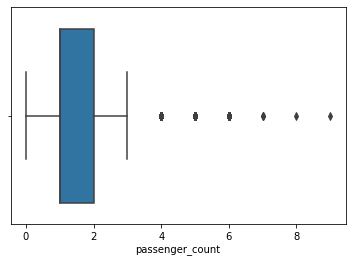

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.passenger_count)

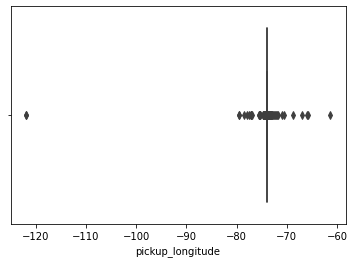

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.pickup_longitude)

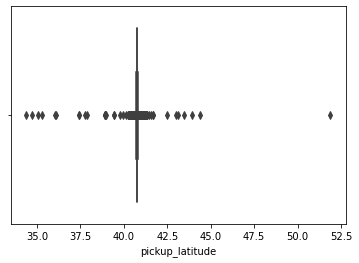

In [ ]:
figsize=(20,20)
sns.boxplot(x=df.pickup_latitude)

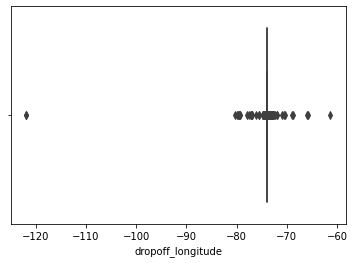

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.dropoff_longitude)

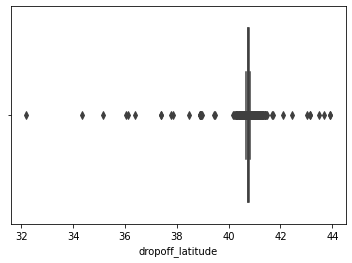

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.dropoff_latitude)

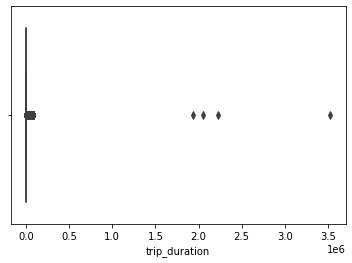

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.trip_duration)

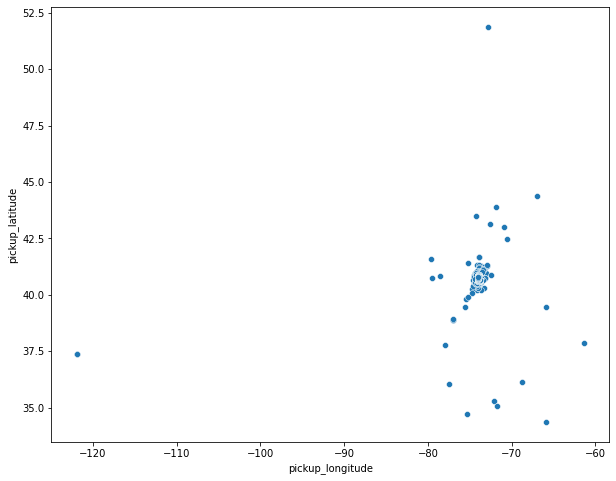

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


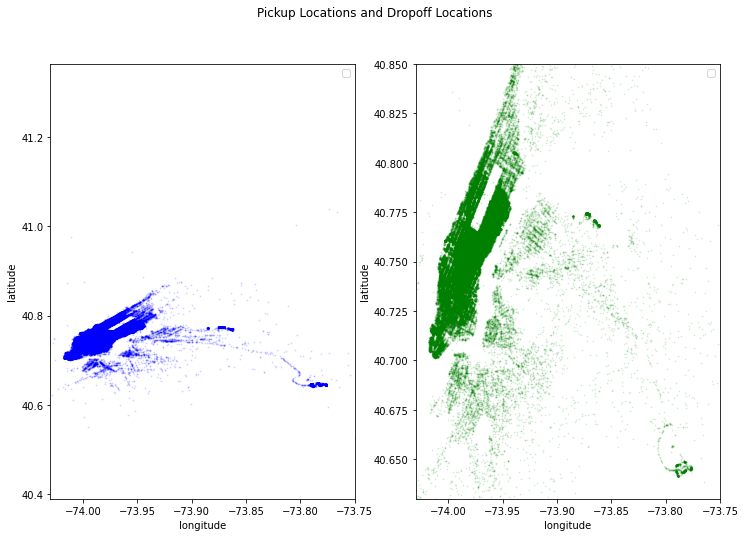

In [ ]:
log=(-74.03,-73.75)
lat=(40.63,40.85)
fig, ax= plt.subplots(ncols=2, sharex= True, figsize=(12,8))

ax[0].scatter(df.pickup_longitude[:100000],df.pickup_latitude[:100000],color='blue',s=1,alpha=0.1)
ax[1].scatter(df.dropoff_longitude[:100000],df.dropoff_latitude[:100000],color='green',s=1,alpha=0.1)
fig.suptitle('Pickup Locations and Dropoff Locations')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
ax[1].legend()
plt.ylim(lat)
plt.xlim(log)
plt.show()

In [ ]:
num_df=df.describe().columns

In [ ]:
num_df

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

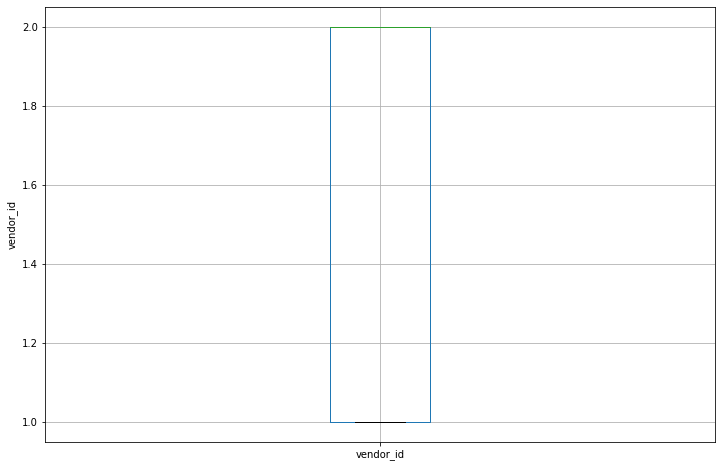

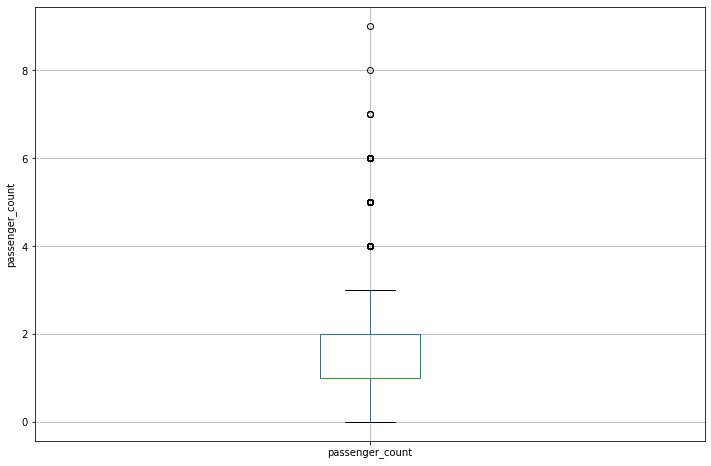

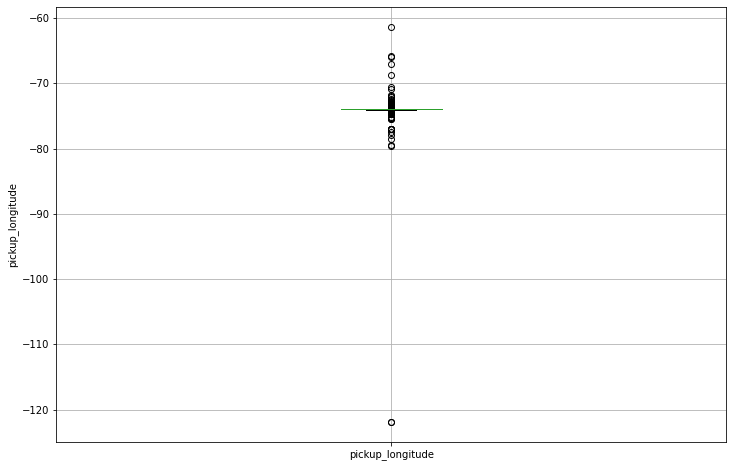

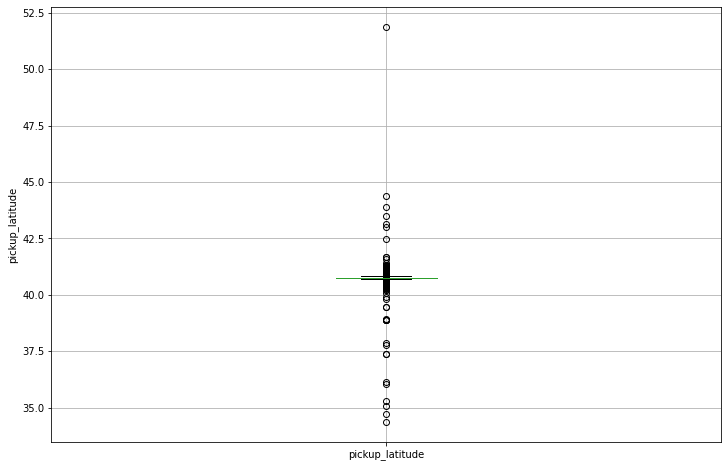

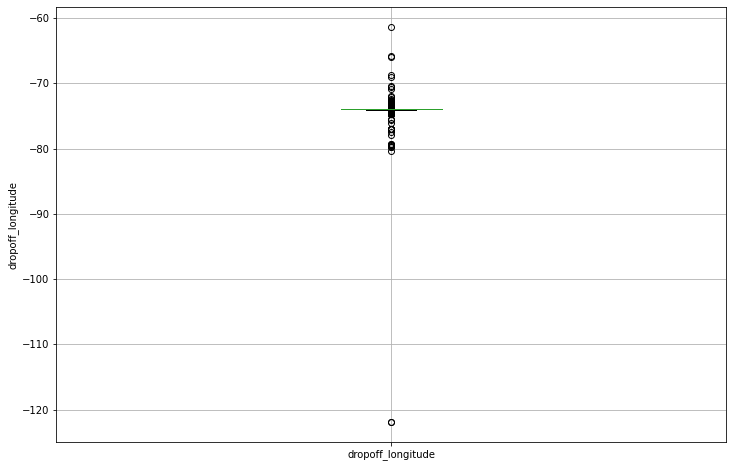

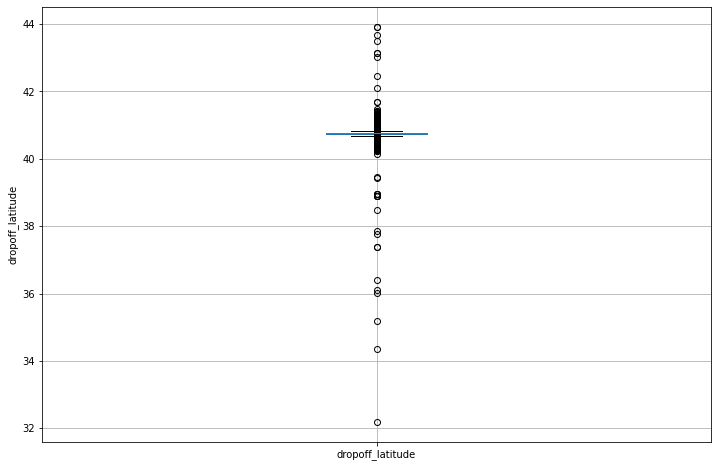

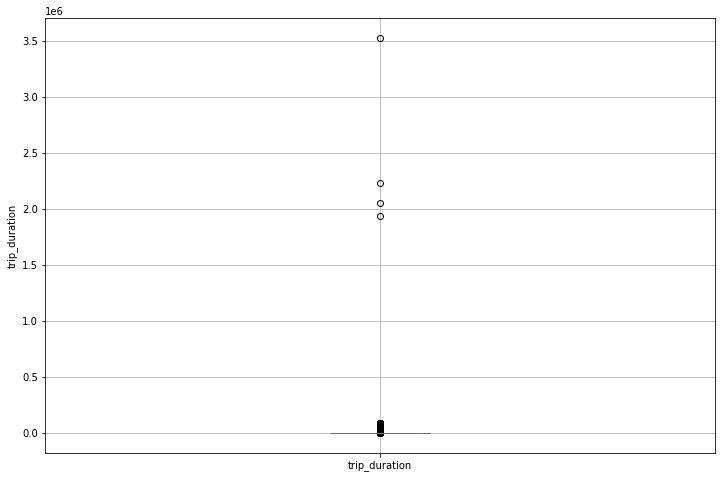

In [ ]:
for i in num_df:
  fig, ax = plt.subplots(ncols=1,figsize=(12,8))
  df.boxplot(column=i, ax=ax)
  ax.set_ylabel(i)
plt.show()

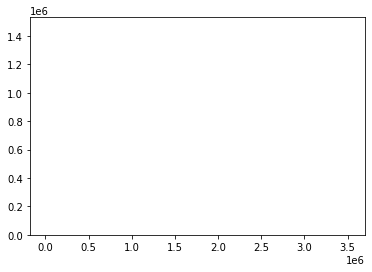

In [ ]:
for i in num_df:
  figsize=(12,8)
  plt.hist(df[i],color='red',width=0.5)
plt.show()

In [ ]:
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime,format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
def month(m):
  r= m.strftime("%B")
  return str(r)

df['pickup_month']=df['pickup_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_month']=df['dropoff_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [ ]:
type(df.pickup_datetime)

pandas.core.series.Series

In [ ]:
def timezone(t):
  if t>=dt.time(4,00,00)and t<=dt.time(5,59,59):
    return 'Early Morning'
  elif t>=dt.time(6,00,00) and t<=dt.time(11,59,59):
    return 'Morning'
  elif t>=dt.time(12,00,00) and t<=dt.time(15,59,59):
    return 'Afternoon'
  elif t>=dt.time(16,00,00) and t<=dt.time(20,59,59):
    return 'Evening'
  elif t>=dt.time(21,00,00) or t<=dt.time(3,59,59):
    return 'Night'
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,January,January,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,January,January,Night,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,January,January,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,January,January,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,January,January,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,January,January,Afternoon,Afternoon
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,January,January,Morning,Morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,January,January,Morning,Morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,January,January,Afternoon,Evening


In [ ]:
df['pickup_timezone'].unique()


array(['Evening', 'Night', 'Morning', 'Afternoon', 'Early Morning'],
      dtype=object)

In [ ]:
df['dropoff_timezone'].unique()

array(['Evening', 'Night', 'Afternoon', 'Morning', 'Early Morning'],
      dtype=object)

Text(0.5, 1.0, 'No of Pickups')

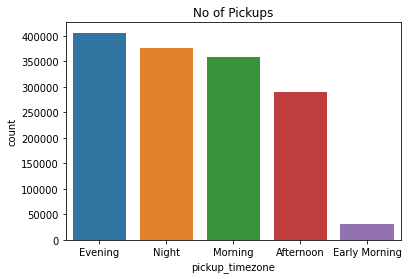

In [ ]:
figsize=(12,8)
sns.countplot(x=df.pickup_timezone, data=df)
plt.title('No of Pickups')

Text(0.5, 1.0, 'No of Dropoffs')

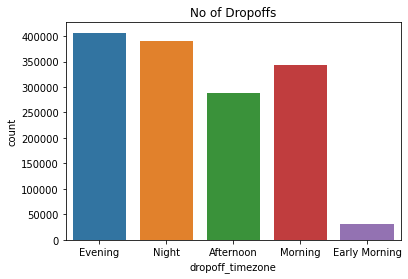

In [ ]:
figsize=(12,8)
sns.countplot(x=df.dropoff_timezone, data=df)
plt.title('No of Dropoffs')

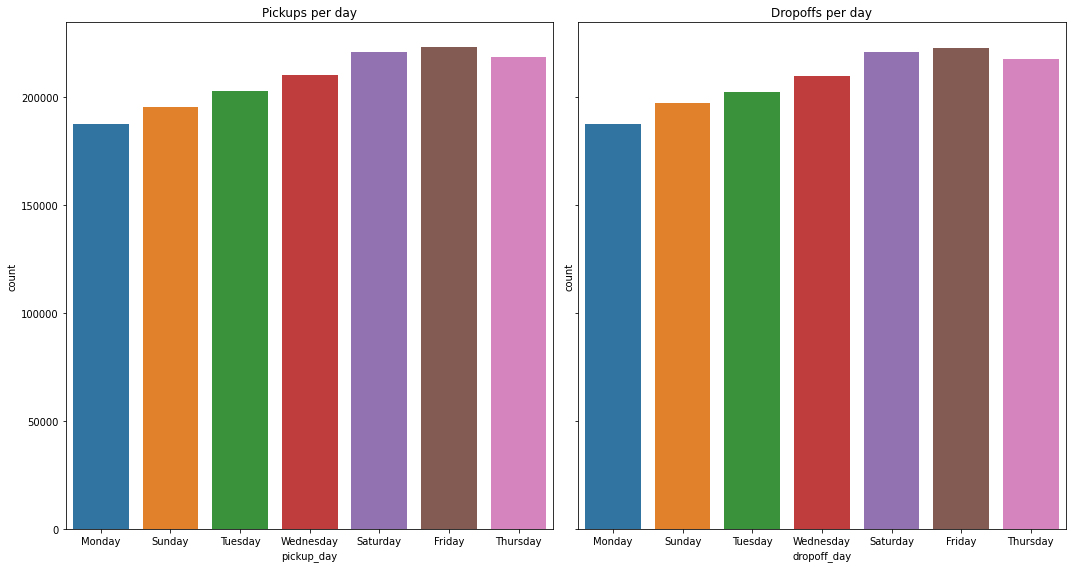

In [ ]:
fig, ax=plt.subplots(ncols=2,sharex=True, sharey=True, figsize=(15,8))
sns.countplot(x=df.pickup_day,data=df, ax=ax[0])
ax[0].set_title('Pickups per day')
sns.countplot(x=df.dropoff_day,data=df, ax=ax[1])
ax[1].set_title('Dropoffs per day')
# plt.tight_layout()
fig.tight_layout()

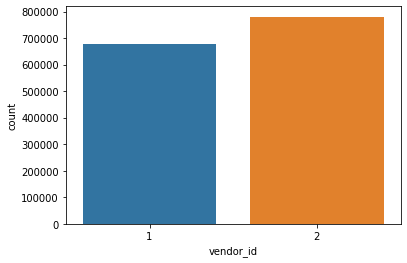

In [ ]:
figsize=(12,8)
sns.countplot(x=df.vendor_id, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


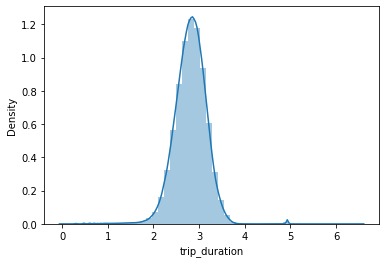

In [ ]:
figsize=(12,9)
sns.distplot(np.log10(df['trip_duration']))#normalization as the data was skewed

Text(0.5, 1.0, 'No of dropoffs per day')

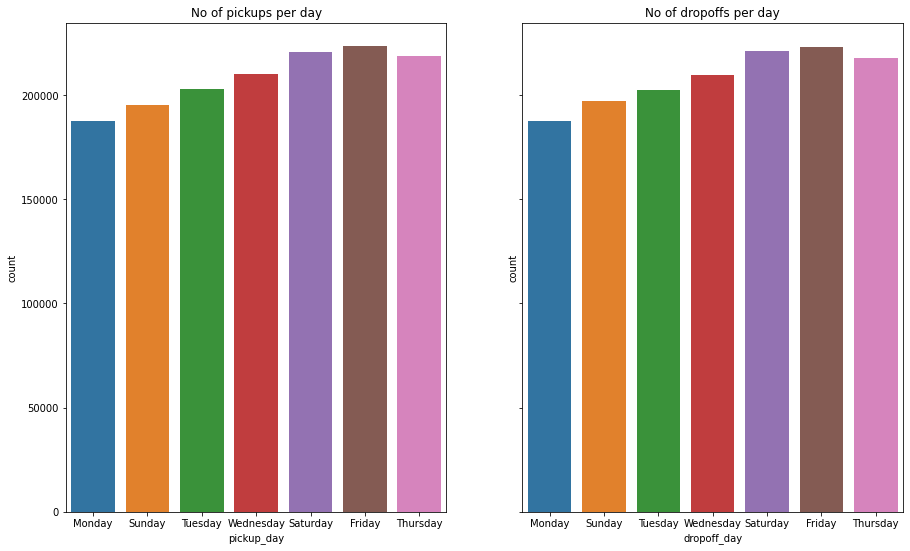

In [ ]:
fig, ax=plt.subplots(ncols=2, sharex=True,sharey=True,figsize=(15,9))
sns.countplot(x=df.pickup_day,data=df, ax=ax[0])
ax[0].set_title('No of pickups per day')
sns.countplot(x=df.dropoff_day,data=df, ax=ax[1])
ax[1].set_title('No of dropoffs per day')



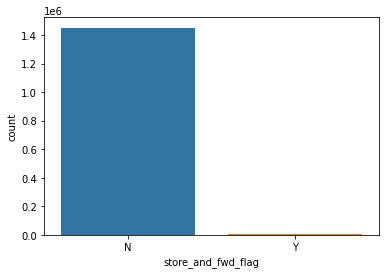

In [ ]:
figsize=(12,8)
sns.countplot(x=df.store_and_fwd_flag, data=df)

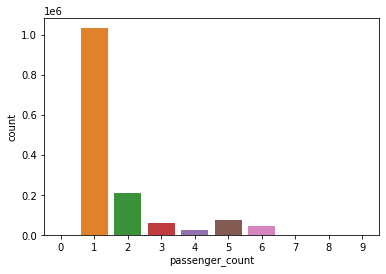

In [ ]:
figsize=(12,8)
sns.countplot(x=df.passenger_count, data=df)

In [ ]:
def dist(lat1,lat2,log1,log2):
  # lat_1= radians(lat1)
  # lat_2= radians(lat2)
  # log_1= radians(log1)
  # log_2= radians(log2)
  # dist_lat=lat_2-lat_1
  # dist_log=log_2-log_1

  # a= sin(dist_lat/2)**2 + cos(lat_1) * cos(lat_2) * sin(dist_log/2)**2
  # c= 2 *atan2(sqrt(a).sqrt(1-a))

  # r=6371
  # return(c*r)
  loc1=(lat1,log1)
  loc2=(lat2,log2)

  return geopy.distance.vincenty(loc1,loc2).km

df['distance']=df.apply(lambda x: dist(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df['distance']=np.log(df.distance)
df['trip_duration']=np.log(df.trip_duration)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,Monday,Monday,January,January,Evening,Evening,0.406912
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,Sunday,Sunday,January,January,Night,Night,0.592586
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,Tuesday,Tuesday,January,January,Morning,Afternoon,1.853119
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,Wednesday,Wednesday,January,January,Evening,Evening,0.394493
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,Saturday,Saturday,January,January,Afternoon,Afternoon,0.171461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,6.656727,Friday,Friday,January,January,Afternoon,Afternoon,0.204645
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,6.484635,Sunday,Sunday,January,January,Morning,Morning,1.799432
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,6.638568,Friday,Friday,January,January,Morning,Morning,2.056880
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,5.921578,Tuesday,Tuesday,January,January,Afternoon,Evening,0.088491


In [ ]:
df.head(25)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,Monday,Monday,January,January,Evening,Evening,0.406912
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,Sunday,Sunday,January,January,Night,Night,0.592586
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,Tuesday,Tuesday,January,January,Morning,Afternoon,1.853119
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,Wednesday,Wednesday,January,January,Evening,Evening,0.394493
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,Saturday,Saturday,January,January,Afternoon,Afternoon,0.171461
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,6.093570,Saturday,Saturday,January,January,Night,Night,0.094969
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,5.831882,Friday,Friday,January,January,Night,Night,0.283169
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,7.346655,Saturday,Saturday,January,January,Morning,Morning,1.743621
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,5.541264,Friday,Friday,January,January,Night,Night,0.271979
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,7.110696,Thursday,Thursday,January,January,Night,Night,1.632140


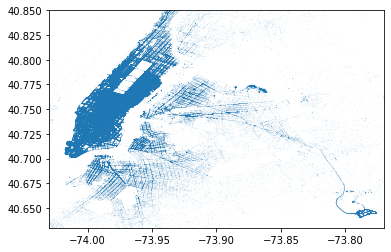

In [ ]:
lng=list(df.pickup_longitude)+list(df.dropoff_longitude)
lati=list(df.pickup_latitude)+list(df.dropoff_latitude)
figsize=(12,10)
plt.plot(lng,lati,'.',alpha=0.4,markersize=0.05)
plt.xlim(-74.03,-73.77)
plt.ylim(40.63,40.85)
plt.show()

In [ ]:
# map_scatter=px.scatter_mapbox(df,lat='pickup_latitude',lon='pickup_longitude',title="Pickup locations with respective details")
# map_scatter.update_layout(mapbox_style="open-street-map")
# map_scatter.show()

In [ ]:
# locations=list(zip(df.pickup_latitude,df.pickup_longitude))
# m=folium.Map(location=[40.80,-73.7],zoom_start=9)
# FastMarkerCluster(data=locations).add_to(m)
# m

In [ ]:
# import plotly.express as px
# import geopandas as gpd

# px.set_mapbox_access_token(open(".mapbox_token").read())
# fig = px.scatter_mapbox(df,
#                         lat=df.pickup_latitude,
#                         lon=df.pickup_longitude,
#                         hover_name="pickup_timezone",
#                         zoom=1)
# fig.show()

In [ ]:
num_feature=df.describe().columns

In [ ]:
num_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance'],
      dtype='object')

In [ ]:
num_feature.drop('vendor_id')

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance'],
      dtype='object')

In [ ]:

p_1=np.percentile(df['distance'],25)
p_3=np.percentile(df['distance'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['distance']>low_lim]
df=df[df['distance']<up_lim]

df.shape


(1433716, 18)

In [ ]:

p_1=np.percentile(df['passenger_count'],25)
p_3=np.percentile(df['passenger_count'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['passenger_count']>low_lim]
df=df[df['passenger_count']<up_lim]

df.shape

(1281375, 18)

In [ ]:
p_1=np.percentile(df['trip_duration'],25)
p_3=np.percentile(df['trip_duration'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['trip_duration']>low_lim]
df=df[df['trip_duration']<up_lim]

df.shape

(1270291, 18)

In [ ]:
#onehot encoding
df=pd.get_dummies(data=df,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone','dropoff_timezone']
                    ,drop_first=True)

In [ ]:
df=df.drop(columns=['id'],axis=1)

In [ ]:
df=df.drop(['pickup_datetime','dropoff_datetime'],axis=1)

In [ ]:

x = df.drop(columns=['trip_duration'],axis=1)

y = df['trip_duration'][:100000]
x=x[:100000]

In [ ]:
from scipy.stats import zscore
x=x.apply(zscore)[:100000]

Text(0.5, 1.0, 'Correlation Plot')

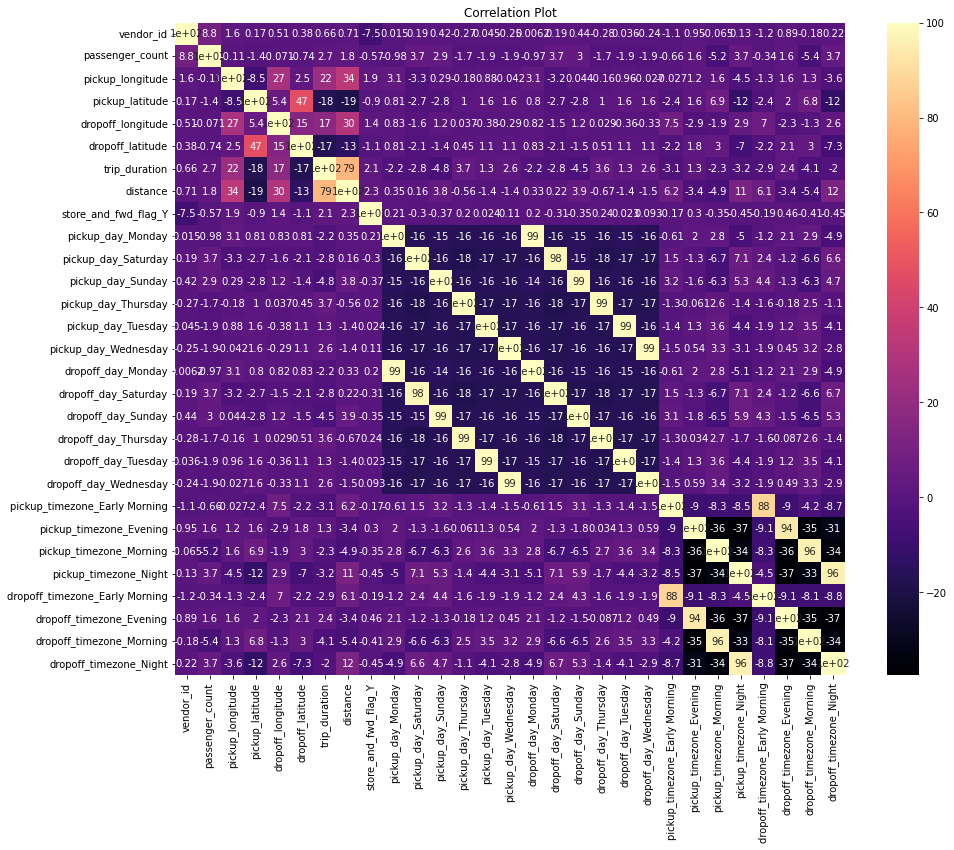

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr()*100,annot=True,cmap='magma')
plt.title('Correlation Plot')

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:

lm.coef_

array([-3.87055484e-04,  1.07580308e-02, -3.66561592e-02, -9.31672628e-03,
       -2.96283584e-02, -3.49619762e-02,  5.86985261e-01,  2.37292655e-03,
       -1.69500292e-01, -8.36775415e-02, -2.02777766e-01, -1.15530919e-02,
       -1.00410647e-01, -5.62106637e-02,  1.36989010e-01,  5.18695729e-02,
        1.43684221e-01,  1.99779882e-02,  9.99543986e-02,  5.97793331e-02,
       -5.92803081e-02, -9.09067574e-02,  5.74756641e-02, -1.53512803e-01,
       -1.36246317e-02,  4.78933912e-02, -1.14328442e-01,  2.80283310e-02])

In [ ]:
lm.intercept_

6.477999590396359

In [ ]:



lm.score(x_train,y_train)

0.6789786451405951

In [ ]:

y_pred_train=lm.predict(x_train)
y_pred_train

array([5.64325148, 6.86013794, 7.20167533, ..., 7.16874337, 6.73273937,
       6.19685607])

In [ ]:
r2_train=r2_score((y_train),(y_pred_train))
r2_train

0.6789786451405951

In [ ]:
from seaborn import regression
def adj_r2(x,y,r2):
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2 =1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [ ]:
adj_r2(x_train,y_train,r2_train)


0.6788587508089727

In [ ]:
lm.score(x_test,y_test)

0.672567229995396

In [ ]:
y_pred_test=lm.predict(x_test)
y_pred_test

array([6.52893031, 6.47104585, 6.66109815, ..., 6.30615336, 6.2766055 ,
       7.3410671 ])

In [ ]:
r2_test=r2_score((y_test),(y_pred_test))
r2_test

0.672567229995396

In [ ]:
adj_r2(x_test,y_test,r2_test)

0.6722000793982982

In [ ]:
train_mse=mean_squared_error((y_train),(y_pred_train))
train_mse

0.1588438520836853

In [ ]:
test_mse=mean_squared_error((y_test),(y_pred_test))
test_mse

0.16172393230149798

In [ ]:
x_test.shape

(25000, 28)

In [ ]:
y_test.shape

(25000,)

In [ ]:
y_pred_test.shape

(25000,)

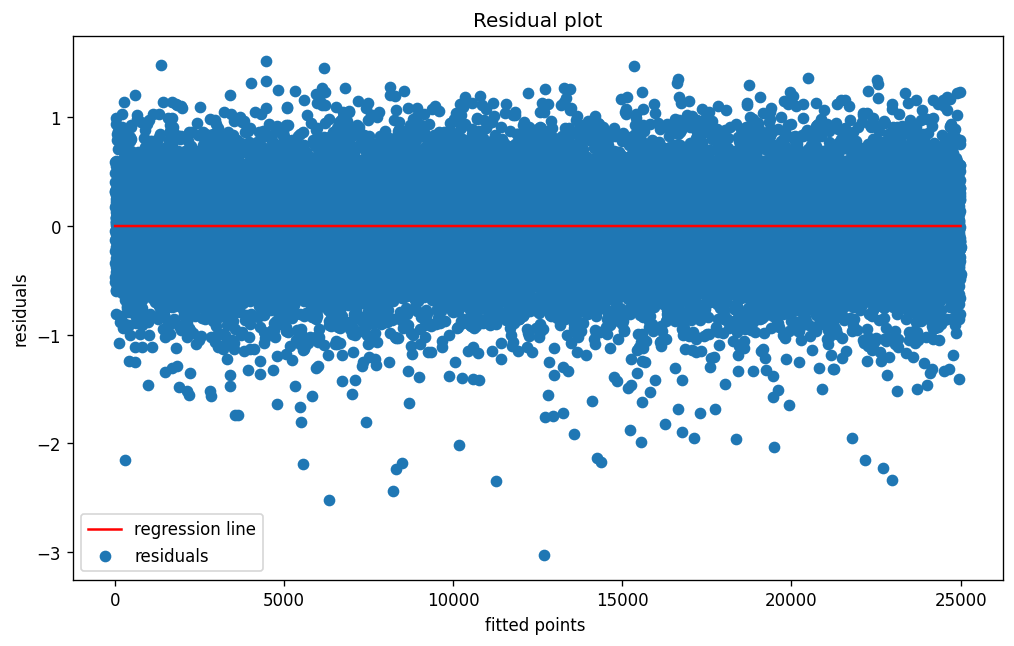

In [ ]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg=PolynomialFeatures(degree=4)
# x_poly=poly_reg.fit_transform(x_train)
# poly_reg.fit(x_poly,y_test)


In [ ]:
pip install graphviz

In [ ]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
# from sklearn import StringIO  
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
x = df.drop(columns=['trip_duration'],axis=1)

y = df['trip_duration']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [ ]:
clf= DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'distance',
 'store_and_fwd_flag_Y',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Monday',
 'dropoff_day_Saturday',
 'dropoff_day_Sunday',
 'dropoff_day_Thursday',
 'dropoff_day_Tuesday',
 'dropoff_day_Wednesday',
 'pickup_timezone_Early Morning',
 'pickup_timezone_Evening',
 'pickup_timezone_Morning',
 'pickup_timezone_Night',
 'dropoff_timezone_Early Morning',
 'dropoff_timezone_Evening',
 'dropoff_timezone_Morning',
 'dropoff_timezone_Night']

In [ ]:
# # create a dot_file which stores the tree structure
# dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  
# # graph.write_png("myTree.png")
# # Show graph
# Image(graph.create_png())

In [ ]:
clf.score(X_train,Y_train)

-0.13667164873912907

In [ ]:
py_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test,Y_test)

-0.13289377534513358

In [ ]:
y_pred_train_dec=clf.predict(X_train)
y_pred_test_dec=clf.predict(X_test)

In [ ]:
# scalar=StandardScaler()
# x_transform=scalar.fit_transform(x)

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [ ]:
# clf=DecisionTreeRegressor()
# clf.fit(x_train,y_train)
# clf.score(x_test,y_test)

In [ ]:
# grid_param={'max_depth':[4,6,8,10],'min_samples_leaf':[10,15,20],'min_samples_split':[10,22,30]}

In [ ]:
# grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [ ]:
# grid_search.fit(x_train,y_train)

In [ ]:
# best_para=grid_search.best_params_

In [ ]:
# best_para

In [ ]:
# grid_search.best_score_

In [ ]:
# grid_search.score(x_test,y_test)

In [ ]:
# ydeci_pred_train=grid_search.predict(x_train)

In [ ]:
# ydec_pred_test=grid_search.predict(x_test)

In [ ]:
# tree.plot_tree(clf)
# plt.show()

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c656ba090>>

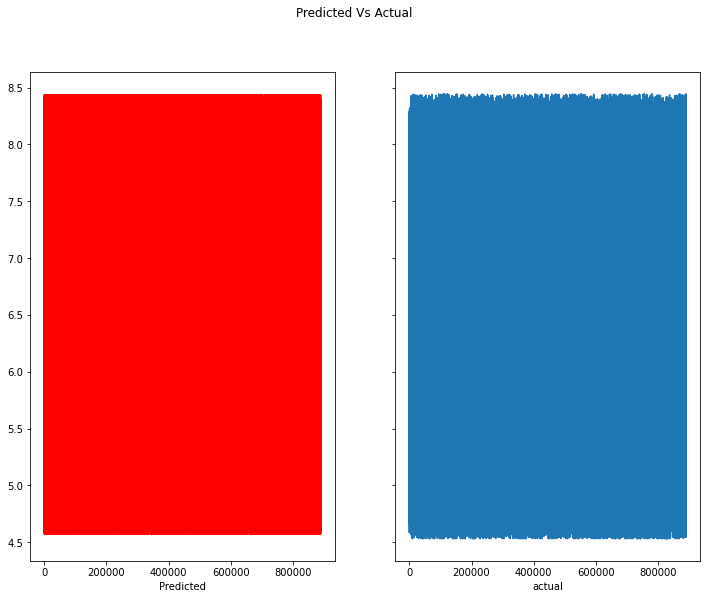

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_train_dec,color='red')
ax[1].plot(np.array(Y_train))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend


<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c57bffe50>>

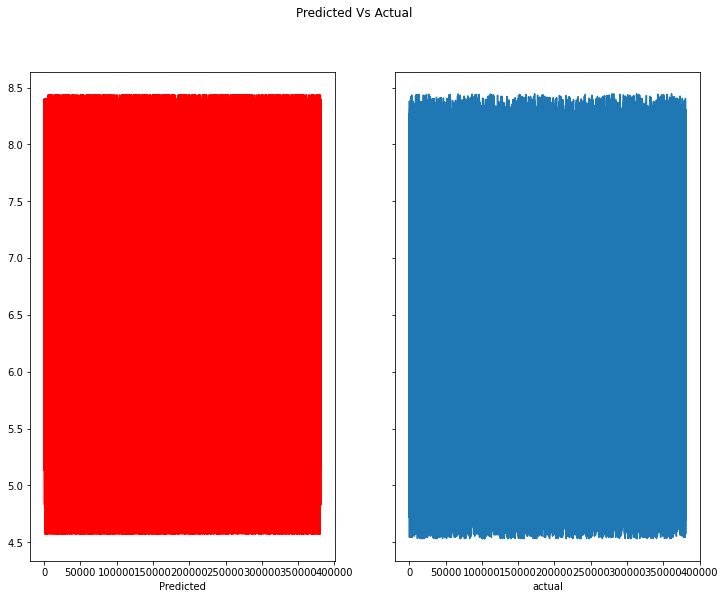

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_test_dec,color='red')
ax[1].plot(np.array(Y_test))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend

In [ ]:
# dec_train_mse=mean_squared_error(y_train,ydeci_pred_train)
# dec_train_mse

In [ ]:
# dec_test_mse=mean_squared_error(y_test,ydec_pred_test)
# dec_test_mse

In [ ]:
# dec_train_r2=r2_score(y_train,ydeci_pred_train)
# dec_train_r2

In [ ]:
# dec_test_r2=r2_score(y_test,ydec_pred_test)
# dec_test_r2

In [ ]:
# dec_adj_train=adj_r2(x_train,y_train,dec_train_r2)
# dec_adj_train

In [ ]:
# dec_adj_test=adj_r2(x_test,y_test,dec_test_r2)
# dec_adj_test

In [ ]:
# imp_fea=clf.feature_importances_
# imp_fea

In [ ]:
# imp_dict={'Feature':list(X_train.columns),'Feat_importance':imp_fea}

In [ ]:
# imp_dict

In [ ]:
# imp_dict['Feat_importance']=round(imp_dict['Feat_importance'],2)

RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train,Y_train)
preds = rfr.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test,preds))
r2 = r2_score(Y_test,preds)
print(f"RMSE is: {RMSE}")
print(f"R2 = {r2}")
adj_r2 = 1-(1-rfr.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"ADJ_R2 = {adj_r2}")

RMSE is: 0.34941034527510945
R2 = 0.7521077407378078
ADJ_R2 = 0.8946050922802486


In [ ]:
scalar=StandardScaler()
x_transform=scalar.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train,y_train)
preds = rfr.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print(f"RMSE is: {RMSE}")
print(f"R2 = {r2}")
adj_r2 = 1-(1-rfr.score(x_transform,y))*(len(y)-1)/(len(y)-x_transform.shape[1]-1)
print(f"ADJ_R2 = {adj_r2}")

RMSE is: 0.34910608806349497
R2 = 0.7525392687130464
ADJ_R2 = 0.8946339465259894


In [ ]:
y_pred_train_rf=rfr.predict(x_train)
y_pred_test_rf=rfr.predict(x_test)

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c577f9910>>

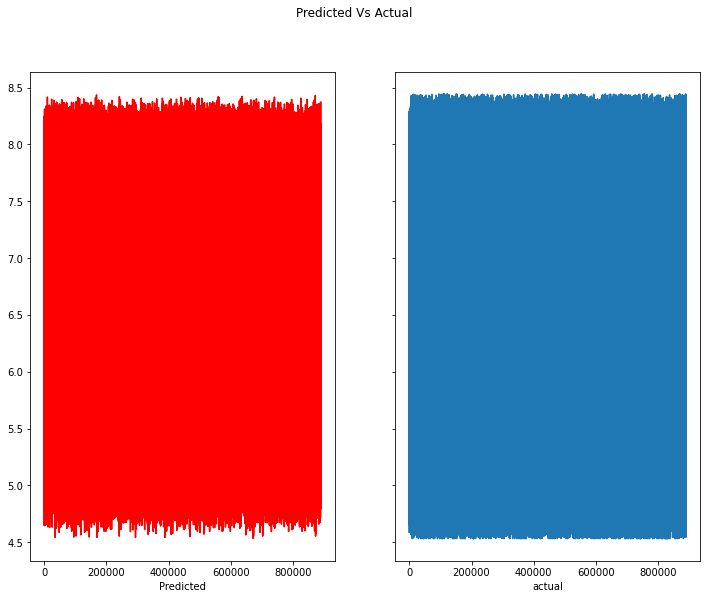

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_train_rf,color='red')
ax[1].plot(np.array(y_train))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c577538d0>>

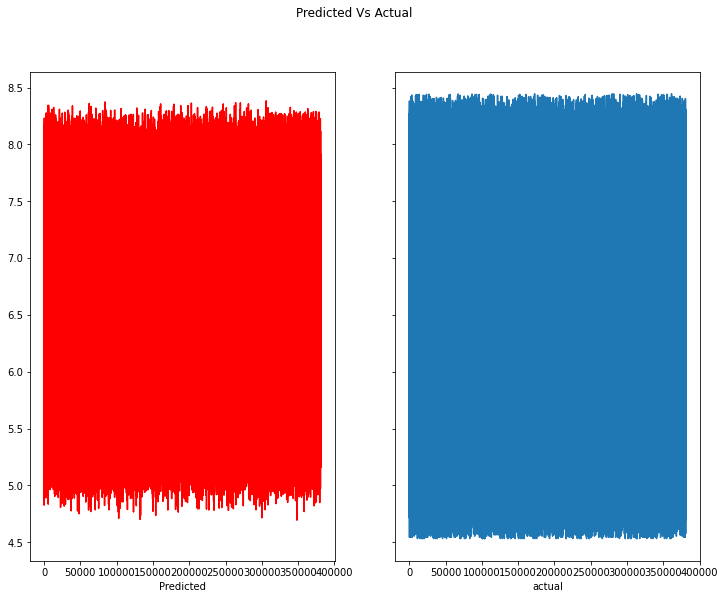

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_test_rf,color='red')
ax[1].plot(np.array(y_test))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend

In [ ]:
important = rfr.feature_importances_

important_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : important}

important_df = pd.DataFrame(important_dict)
important_df['Feature Importance'] = round(important_df['Feature Importance'],2)

In [ ]:
important_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
important_df

,Feature,Feature Importance
6,distance,0.68
5,dropoff_latitude,0.07
2,pickup_longitude,0.06
4,dropoff_longitude,0.06
3,pickup_latitude,0.05
23,pickup_timezone_Night,0.02
26,dropoff_timezone_Morning,0.01
1,passenger_count,0.01
20,pickup_timezone_Early Morning,0.01
0,vendor_id,0.00


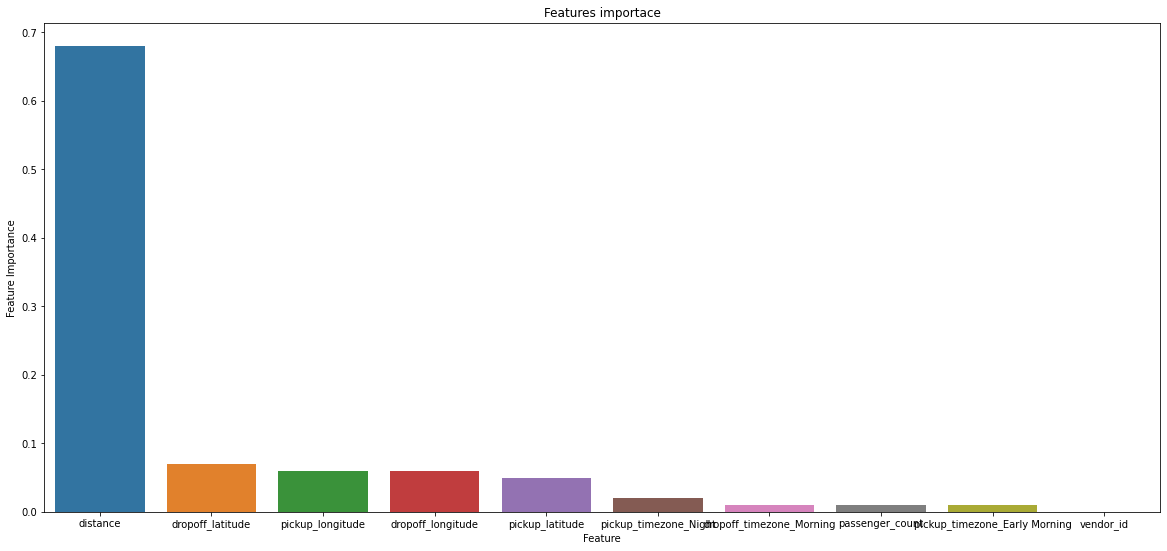

In [ ]:
plt.figure(figsize=(20,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=important_df[:10])

In [ ]:
max_depth=[4,6,8,10]
min_samples_split=[10,20,25,30]
min_samp_leaf=[10,14,18,20]

param_dict={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samp_leaf}

Decision Tree Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt=DecisionTreeRegressor()
dt_cv=GridSearchCV(estimator=dt,param_grid=param_dict,cv=5,verbose=2,scoring='r2')
dt_cv.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   4.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   4.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.5s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=25; total time=   3.4s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 14, 18, 20],
                         'min_samples_split': [10, 20, 25, 30]},
             scoring='r2', verbose=2)

In [ ]:
dt_cv.best_score_

0.6994834315828611

In [ ]:
dt_cv.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30)

In [ ]:
dt_best_model=dt_cv.best_estimator_

In [ ]:
y_pred_train_dt_cv=dt_best_model.predict(x_train)
y_pred_test_dt_cv=dt_best_model.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred_test_dt_cv))
r2 = r2_score(y_test,y_pred_test_dt_cv)
print(f"RMSE is: {RMSE}")
print(f"R2 = {r2}")
adj_r2 = 1-(1-dt_best_model.score(x_transform,y))*(len(y)-1)/(len(y)-x_transform.shape[1]-1)
print(f"ADJ_R2 = {adj_r2}")

RMSE is: 0.38397361786600054
R2 = 0.700639690942011
ADJ_R2 = 0.7030215864307943


<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c57527350>>

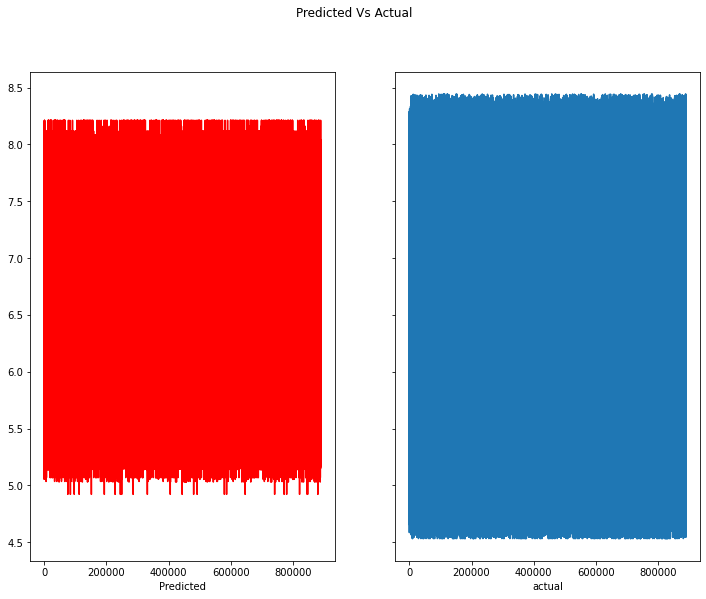

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_train_dt_cv,color='red')
ax[1].plot(np.array(y_train))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c574db150>>

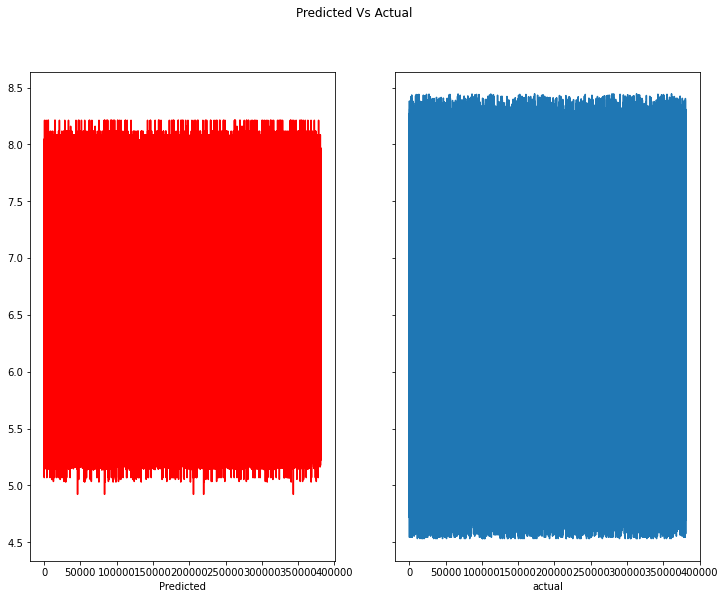

In [ ]:
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(12,9))
ax[0].plot(y_pred_test_dt_cv,color='red')
ax[1].plot(np.array(y_test))
fig.suptitle('Predicted Vs Actual')
ax[0].set_xlabel('Predicted')
ax[0].legend
ax[1].set_xlabel('actual')
ax[1].legend

AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
aboost_reg = AdaBoostRegressor(n_estimators=30)

In [ ]:
aboost_reg.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=30)

In [ ]:
aboost_pred = aboost_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,aboost_pred))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test,aboost_pred)
print(f"R2: {r2}")
adj_r2 = 1-(1-r2_score((y_test), (preds)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print(f"adj_r2: {adj_r2}")

RMSE: 0.44293431427295243
R2: 0.6016451583719487
adj_r2: 0.7525210854383408


In [ ]:
aboost_reg.score(x_train,y_train)

0.6004668109416907

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=20,max_depth=4)

In [ ]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=20)

In [ ]:
gb_preds = gb_reg.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,gb_preds))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test,gb_preds)
print(f"R2: {r2}")
adj_r2 = 1-(1-r2_score((y_test), (preds)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print(f"adj_r2: {adj_r2}")

RMSE: 0.4058915055730131
R2: 0.6654882540536299
adj_r2: 0.7525210854383408


In [ ]:
gb_reg.score(x_train,y_train)

0.6649678597471005

In [ ]:
n_estimators = [50,100,120]
max_depth=[5,7,9]
min_samples_split = [40,50]
param_xgb = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split

            }

XGBoost Regressor

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbmodel = xgb.XGBRegressor()
xg_grid = GridSearchCV(estimator = xgbmodel,param_grid=param_xgb,verbose=2,cv=3,scoring='r2')
xg_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[10:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  52.8s
[10:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  49.7s
[10:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  49.3s
[10:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time= 1.6min
[10:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xg_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [ ]:
xg_grid.best_score_

0.7713091241206066

In [ ]:
xg_fine_model = xg_grid.best_estimator_
xg_pred = xg_fine_model.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test,xg_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, xg_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (xg_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.11196681236405387
RMSE : 0.33461442342501296
R2 : 0.7726574321021056
Adjusted R2 :  0.7726407270986779


Conclusion:
The taxi trip data has been successfully visualized and analysed on top of that we also added few machine learning models on the dataset after carefully finetuningit.


* linear Regression: 67%
* Decision Tree: 69%
* RandomForest : 90%

Boosting Methods:
* ADABoost: 52%
* GradientBoosting: 57%
* XGboosting: 70%




After closely analysing the models and their boosting methods we can clearly see that Random Forest gave best scores and the results are on par when tested the test values with actual data set